# Detecting Phishing Website Using ML Algorithms

### Problem Statement

Our main goal is to experiment with existing ML algorithms on a data generated primarily to detect the phishing websites online. The dataset is a combination of both Legitimate URLs and phishing URLs. In the end, we compare the ML algorithms used to find the algorithm with a performance most suitable to predict phishing URLs.

### Import packages

In [5]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Fetch Data
The csv file 'websiteUrlData.csv' is a final data after transformations and feature engineering. It a dataset that has a combination of both phihsing Urls and Legitimate Urls for our experiment.

In [4]:
#load data
url_data = pd.read_csv('/Users/preethibharathy/Downloads/Phishing_Detecting_Impelementation/DataFiles/websiteUrlData.csv')
url_data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


### Data Understanding

In [6]:
#dataset shape
url_data.shape

(10000, 18)

In [7]:
#structre of dataset
url_data.dtypes

Domain           object
Have_IP           int64
Have_At           int64
URL_Length        int64
URL_Depth         int64
Redirection       int64
https_Domain      int64
TinyURL           int64
Prefix/Suffix     int64
DNS_Record        int64
Web_Traffic       int64
Domain_Age        int64
Domain_End        int64
iFrame            int64
Mouse_Over        int64
Right_Click       int64
Web_Forwards      int64
Label             int64
dtype: object

In [8]:
#further infomation on dataset
url_data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


### Data Visualization
Visalizing the distribution of each column in the dataset

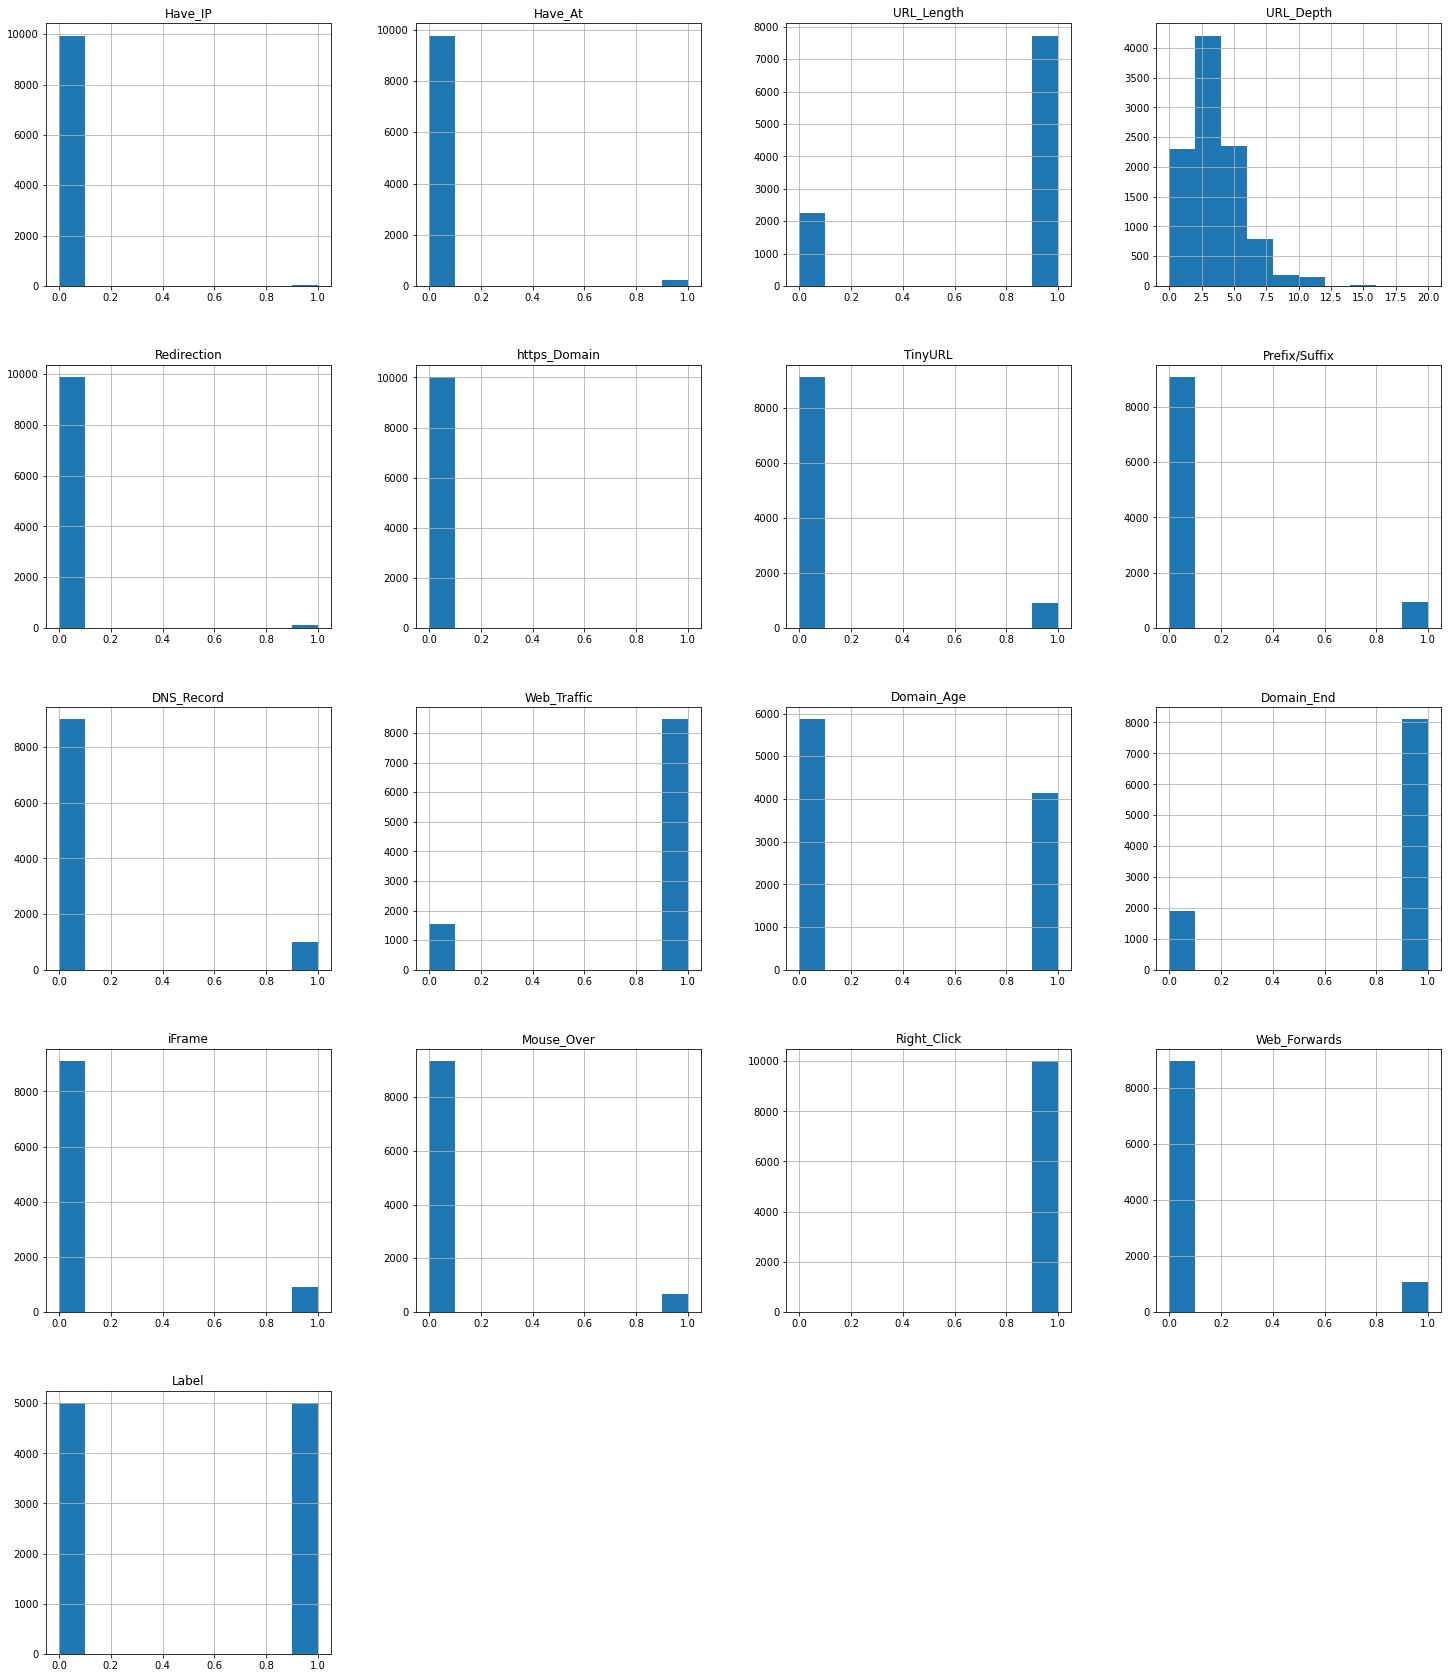

In [23]:
#plot all the column distribution
url_data.hist(figsize = (25,30))
plt.show()

### Data Preprocessing

In [24]:
url_data.head(50)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
7,thenextweb.com,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
8,tobogo.net,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0


In [26]:
'''From the above view of the data, we see that most columns in this dataset is 0 or 1. URL_Depth is one column with numeric data. Domain column on the other hand is categorical and doesnt add a lot of value. So we drop this column'''

'From the above view of the data, we see that most columns in this dataset is 0 or 1. URL_Depth is one column with numeric data. Domain column on the other hand is categorical and doesnt add a lot of value. So we drop this column'

In [27]:
#Dropp Domain column
url_data = url_data.drop(['Domain'], axis = 1).copy()

In [28]:
#checking for null values
url_data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [31]:
'''No need for null value treatment as there are no null values in the dataset'''

'No need for null value treatment as there are no null values in the dataset'

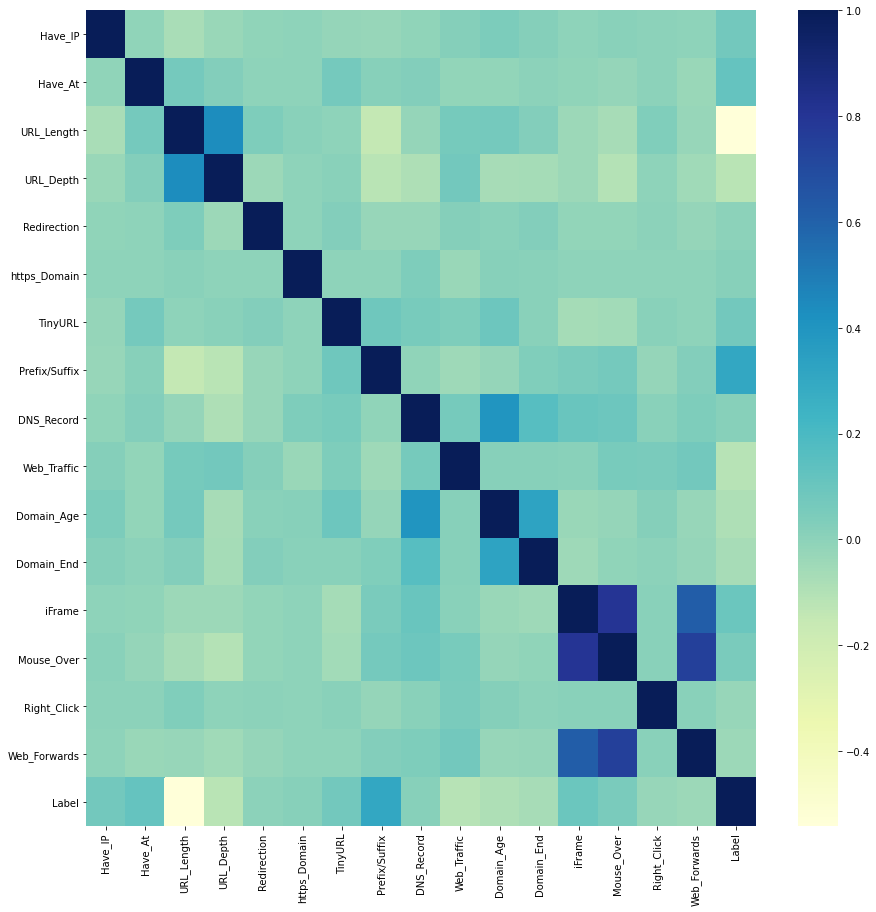

In [32]:
#understanding corelation betweeen the columns
plt.figure(figsize=(15,15))
sns.heatmap(url_data.corr(), cmap="YlGnBu")
plt.show()

In [33]:
'''From the heatmap we can see that, the data has both positive and negative correlation and the extracted features will contribute to model training'''

'From the heatmap we can see that, the data has both positive and negative correlation and the extracted features will contribute to model training'

### Data Splitting

In [35]:
'''Before we split the data, we shuffle the data so it has equal distrubution of phishing website URLs and legitimate URLs in both the test and the train dataset.'''

'Before we split the data, we shuffle the data so it has equal distrubution of phishing website URLs and legitimate URLs in both the test and the train dataset.'

In [36]:
url_data = url_data.sample(frac=1).reset_index(drop=True)
url_data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,6,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,0,3,0,0,0,1,1,1,1,1,0,0,1,0,1
4,0,0,1,6,0,0,0,0,0,1,0,1,0,0,1,0,1


In [37]:
# Splitting data to test and train - 80-20 split
from sklearn.model_selection import train_test_split
y = url_data['Label']
X = url_data.drop('Label',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

### Model Training

Its clear from the problem statement that this is a calssification problem.
Therefore, we the following dataset to detect if an URL is phishing (1) or not (0).
* Decision Tree
* Support Vector Machines
* Random Forest
* XGBoost
* Multilayer Perceptrons

In [38]:
#importing packages
from sklearn.metrics import accuracy_score

In [103]:
# Storing model performance results
Model = []
train_accuracy = []
test_accuracy = []

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# create the model 
Dtree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
Dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
#model prediction
DT_test_pred = tree.predict(X_test)
DT_train_pred = tree.predict(X_train)

In [58]:
#accuracy of the model
LR_train_accuracy = accuracy_score(y_train, DT_train_pred)
LR_test_accuracy = accuracy_score(y_test, DT_test_pred)

print("Accuracy of Decision Tress on training Data: {:.3f}".format(train_accuracy))
print("Accuracy on Decision Tree on test Data: {:.3f}".format(test_accuracy))

Accuracy of Decision Tress on training Data: 0.814
Accuracy on Decision Tree on test Data: 0.805


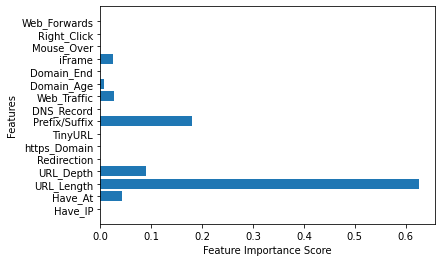

In [56]:
#feature improtance in decision tree model
plt.barh(range(X_train.shape[1]), tree.feature_importances_)
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [57]:
'''From the above, we see that URL_Length is contributed the most to the Decision Tree Model'''

'From the above, we see that URL_Length is contributed the most to the Decision Tree Model'

In [104]:
#storing the results
Model.append('Decision Tree')
train_accuracy.append(round(LR_train_accuracy, 3))
test_accuracy.append(round(LR_test_accuracy, 3))

In [105]:
print(Model,train_accuracy, test_accuracy)

['Decision Tree'] [0.814] [0.806]


### Support Vector Machine


In [66]:
from sklearn.svm import SVC

# create the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [71]:
#model prediction
SVM_test_pred = svm.predict(X_test)
SVM_train_pred = svm.predict(X_train)

In [72]:
#accuracy of the model
SVM_train_accuracy = accuracy_score(y_train, SVM_train_pred)
SVM_test_accuracy = accuracy_score(y_test, SVM_test_pred)

print("Accuracy of Support Vector Machine on training Data: {:.3f}".format(SVM_train_accuracy))
print("Accuracy on Support Vector Machine on test Data: {:.3f}".format(SVM_test_accuracy))

Accuracy of Support Vector Machine on training Data: 0.804
Accuracy on Support Vector Machine on test Data: 0.793


In [106]:
#storing the results
Model.append('Support Vector Machine')
train_accuracy.append(round(SVM_train_accuracy, 3))
test_accuracy.append(round(SVM_test_accuracy, 3))

In [107]:
print(Model,train_accuracy, test_accuracy)

['Decision Tree', 'Support Vector Machine'] [0.814, 0.804] [0.806, 0.794]


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

# create the model
Ran_forest = RandomForestClassifier(max_depth=5)

# fit the model 
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [87]:
#model prediction
RF_test_pred = random_forest.predict(X_test)
RF_train_pred = random_forest.predict(X_train)

In [88]:
#accuracy of the model
RF_train_accuracy = accuracy_score(y_train,RF_train_pred)
RF_test_accuracy = accuracy_score(y_test,RF_test_pred)

print("Accuracy of Random forest on training Data: {:.3f}".format(RF_train_accuracy))
print("Accuracy of Random forest on test Data: {:.3f}".format(RF_test_accuracy))

Accuracy of Random forest on training Data: 0.818
Accuracy of Random forest on test Data: 0.806


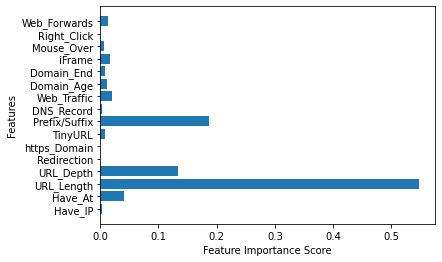

In [91]:
#feature improtance in Random Forest model
plt.barh(range(X_train.shape[1]), random_forest.feature_importances_)
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [92]:
'''From the above, we see that URL_Length is contributed the most to the Random Forest Model as well'''

'From the above, we see that URL_Length is contributed the most to the Random Forest Model as well'

In [108]:
#storing the results
Model.append('Random Forest')
train_accuracy.append(round(RF_train_accuracy, 3))
test_accuracy.append(round(RF_test_accuracy, 3))

In [109]:
print(Model,train_accuracy, test_accuracy)

['Decision Tree', 'Support Vector Machine', 'Random Forest'] [0.814, 0.804, 0.818] [0.806, 0.794, 0.806]


### XGBoost Classifier

In [93]:
from xgboost import XGBClassifier

# create the model
xgboost= XGBClassifier(learning_rate=0.4,max_depth=7)

# fit the model 
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
#model prediction
xgboost_test_pred = xgboost.predict(X_test)
xgboost_train_pred = xgboost.predict(X_train)

In [95]:
#accuracy of the model
xgboost_train_accuracy = accuracy_score(y_train,xgboost_train_pred)
xgboost_test_accuracy = accuracy_score(y_test,xgboost_test_pred)

print("Accuracy of XGBoost on training Data: {:.3f}".format(RF_train_accuracy))
print("Accuracy of XGBoost on test Data: {:.3f}".format(RF_test_accuracy))

Accuracy of XGBoost on training Data: 0.818
Accuracy of XGBoost on test Data: 0.806


In [110]:
#storing the results
Model.append('XGBoost')
train_accuracy.append(round(xgboost_train_accuracy, 3))
test_accuracy.append(round(xgboost_test_accuracy, 3))

In [111]:
print(Model,train_accuracy, test_accuracy)

['Decision Tree', 'Support Vector Machine', 'Random Forest', 'XGBoost'] [0.814, 0.804, 0.818, 0.869] [0.806, 0.794, 0.806, 0.854]


### Multilayer Perceptrons

In [98]:
from sklearn.neural_network import MLPClassifier

# create the model
multi_percep = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
multi_percep.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [99]:
#model prediction
MLP_test_pred = multi_percep.predict(X_test)
MLP_train_pred = multi_percep.predict(X_train)

In [100]:
#accuracy of the model
MLP_train_accuracy = accuracy_score(y_train,MLP_train_pred)
MLP_test_accuracy = accuracy_score(y_test,MLP_test_pred)

print("Accuracy of Multilayer Perceptrons on training Data: {:.3f}".format(MLP_train_accuracy))
print("Accuracy of Multilayer Perceptrons on test Data: {:.3f}".format(MLP_test_accuracy))

Accuracy of Multilayer Perceptrons on training Data: 0.868
Accuracy of Multilayer Perceptrons on test Data: 0.851


In [112]:
#storing the results
Model.append('Multilayer Perceptrons')
train_accuracy.append(round(MLP_train_accuracy, 3))
test_accuracy.append(round(MLP_test_accuracy, 3))

In [113]:
print(Model,train_accuracy, test_accuracy)

['Decision Tree', 'Support Vector Machine', 'Random Forest', 'XGBoost', 'Multilayer Perceptrons'] [0.814, 0.804, 0.818, 0.869, 0.868] [0.806, 0.794, 0.806, 0.854, 0.851]


### Compare Model Results

In [114]:
results = pd.DataFrame({ 'Model': Model,    
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy})
results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.814,0.806
1,Support Vector Machine,0.804,0.794
2,Random Forest,0.818,0.806
3,XGBoost,0.869,0.854
4,Multilayer Perceptrons,0.868,0.851


In [115]:
'''From the above we see that, both XGBoost and Multilayer Preceptrons preform equally well in detecting phishing URLs '''

'From the above we see that, both XGBoost and Multilayer Preceptrons preform equally well in detecting phishing URLs '